# Declarative 500-hPa Absolute Vorticity

By: Kevin Goebbert

This example uses the declarative syntax available through the MetPy package to allow a more convenient method for creating simple maps of atmospheric data. To plot aboslute vorticity, the data is scaled and reassigned to the xarray object for use in the declarative plotting interface.

In [1]:
from datetime import datetime

import xarray as xr

from metpy.plots import declarative
from metpy.units import units

In [2]:
# Set date for desired dataset
dt = datetime(2012, 10, 31, 12)

# Open dataset from NCEI
ds = xr.open_dataset('https://www.ncei.noaa.gov/thredds/dodsC/'
                     f'model-gfs-g4-anl-files-old/{dt:%Y%m}/{dt:%Y%m%d}/'
                     f'gfsanl_4_{dt:%Y%m%d}_{dt:%H}00_000.grb2'
                     ).metpy.parse_cf()

# Subset Data to be just over CONUS
ds_us = ds.sel(lon=slice(360-150, 360-50), lat=slice(65, 20))

## Scale Data

Since absolute vorticity has values much smaller than one, then for plotting contour values with labels it is adventageous to scale values to be whole numbers. This is done by multiplying the variable by `1*10^5` or `1e5`.

In [3]:
ds_us['Absolute_vorticity_isobaric'] = ds.Absolute_vorticity_isobaric * 1e5

## Contour Intervals

Since absolute vorticity rarely goes below zero in the Northern Hemisphere, we can set up a list of contour levels that doesn't include values near but greater than zero. The following code yields a list containing: `[-8, -7, -6, -5, -4, -3, -2, -1, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]`

In [4]:
# Absolute Vorticity colors
# Use two different colormaps from matplotlib and combine into one color set
clevs_500_avor = list(range(-8, 1, 1))+list(range(8, 46, 1))

## The Plot

Using the declarative interface in MetPy to plot the 500-hPa Geopotential Heights and Absolute Vorticity.

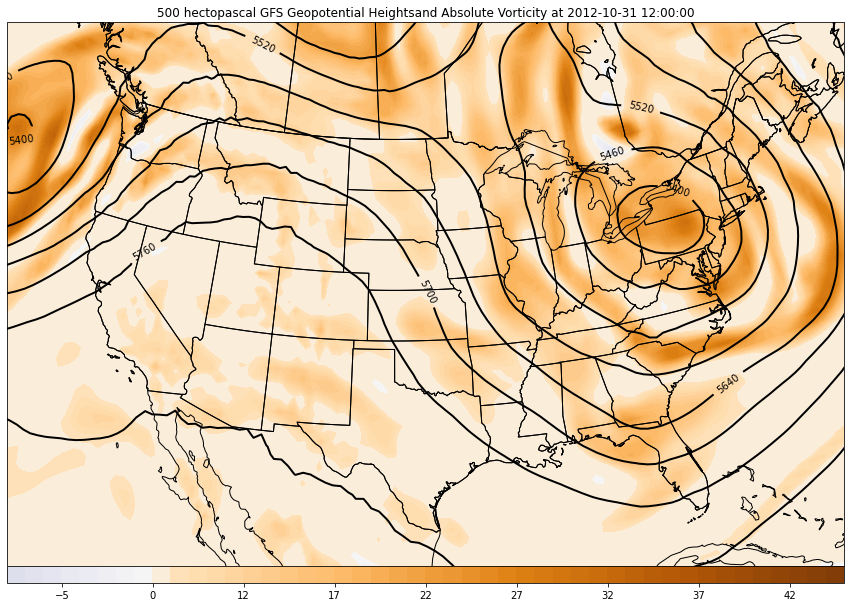

In [5]:
# Set Contour Plot Parameters
contour = declarative.ContourPlot()
contour.data = ds_us
contour.time = dt
contour.field = 'Geopotential_height_isobaric'
contour.level = 500 * units.hPa
contour.linecolor = 'black'
contour.linestyle = '-'
contour.linewidth = 2
contour.clabels = True
contour.contours = list(range(0, 20000, 60))

# Set Color-filled Contour Parameters
cfill = declarative.FilledContourPlot()
cfill.data = ds_us
cfill.time = dt
cfill.field = 'Absolute_vorticity_isobaric'
cfill.level = 500 * units.hPa
cfill.contours = clevs_500_avor
cfill.colormap = 'PuOr_r'
cfill.image_range = (-45, 45)
cfill.colorbar = 'horizontal'

# Panel for plot with Map features
panel = declarative.MapPanel()
panel.layout = (1, 1, 1)
panel.area = (-124, -72, 24, 53)
panel.projection = 'lcc'
panel.layers = ['coastline', 'borders', 'states']
panel.title = (f'{cfill.level} GFS Geopotential Heights'
               f'and Absolute Vorticity at {dt}')
panel.plots = [cfill, contour]

# Bringing it all together
pc = declarative.PanelContainer()
pc.size = (15, 14)
pc.panels = [panel]

pc.show()